<a href="https://colab.research.google.com/github/Angel-Shaha/YouTube-Comment-Analyser/blob/main/Spam_Detection_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
messages = pd.read_csv('/content/ytkagglecombined.csv')

In [ ]:
messages.head()

,CONTENT,CLASS
0,- do you know what trade is?<br>- it&#39;s whe...,0
1,I hate this song! ï»¿,0
2,I love your music ï»¿,0
3,"Something to dance to, even if your sad JUST ...",0
4,!! Thank you! Nice summary! Let&#39;s go for t...,0


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
port_stem= PorterStemmer()

def stemming(content):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', content)
  stemmed_content=re.sub('[^a-zA-Z]',' ',cleantext) #^to remove the words which are not letters
  stemmed_content=stemmed_content.lower() #convert all to lowercase
  stemmed_content=stemmed_content.split() #splitting and storing in a list
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #if word does not belong to stem words then process the stemmed content
  stemmed_content=' '.join(stemmed_content) #joining all tweets

  return stemmed_content

messages['stemmed_content']= messages['CONTENT'].apply(stemming)

In [ ]:
ham_msg = messages[messages.CLASS == 0]
spam_msg = messages[messages.CLASS == 1]

ham_msg_txt = " ".join(ham_msg.stemmed_content.to_numpy().tolist())
spam_msg_txt = " ".join(spam_msg.stemmed_content.to_numpy().tolist())

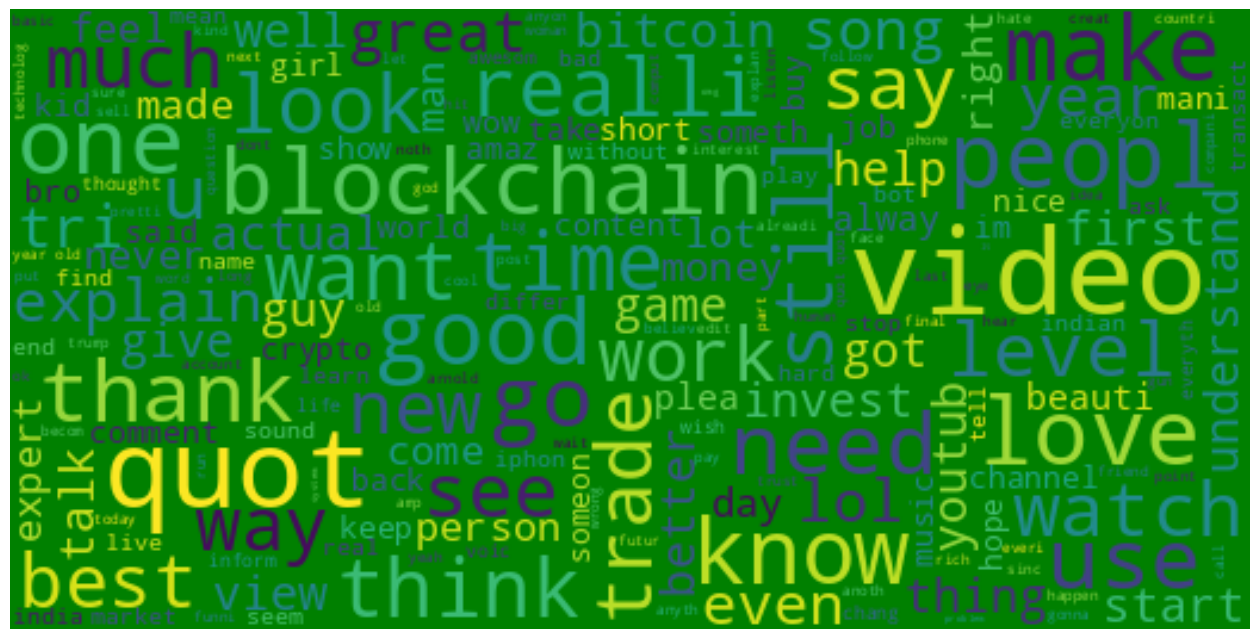

In [ ]:
ham_msg_wcloud = WordCloud(width = 520, height = 260, stopwords = STOPWORDS, max_font_size = 50, background_color = "green").generate(ham_msg_txt)
# ham_msg_wcloud.generate(text)
plt.figure(figsize = (16, 10))
plt.imshow(ham_msg_wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

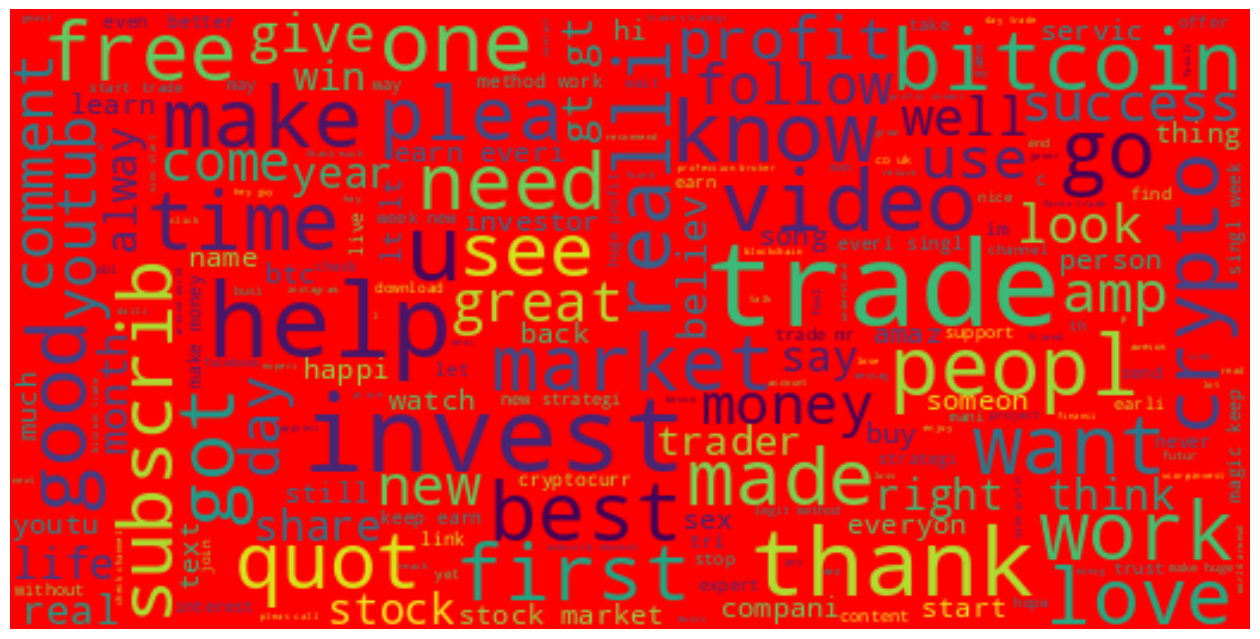

In [ ]:
spam_msg_wcloud = WordCloud(width = 520, height = 260, stopwords = STOPWORDS, max_font_size = 50, background_color = "red").generate(spam_msg_txt)
# ham_msg_wcloud.generate(text)
plt.figure(figsize = (16, 10))
plt.imshow(spam_msg_wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# separating the data as texts and label

X = messages['CONTENT']

Y = messages['CLASS']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(X)

0        - do you know what trade is?<br>- it&#39;s whe...
1                                    I hate this song! ï»¿
2                                    I love your music ï»¿
3         Something to dance to, even if your sad JUST ...
4        !! Thank you! Nice summary! Let&#39;s go for t...
                               ...                        
15207    Hey guys!<br>I hope you all have an amazing da...
15208    Hey guys!<br>I hope you all have an amazing da...
15209    Hey guys!<br>I hope you all have an amazing da...
15210    Hey guys!<br>I hope you all have an amazing da...
15211    Hey guys!<br>I hope you all have an amazing da...
Name: CONTENT, Length: 15212, dtype: object


In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
15207    1
15208    1
15209    1
15210    1
15211    1
Name: CLASS, Length: 15212, dtype: int64


In [ ]:
#text preprocessing

#defining preprocessing hyperparameters

max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 1000

#tokenization
tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

#get the word index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'a': 3,
 'i': 4,
 'to': 5,
 'and': 6,
 'you': 7,
 'is': 8,
 'br': 9,
 'of': 10,
 '39': 11,
 'in': 12,
 'it': 13,
 'for': 14,
 'this': 15,
 'my': 16,
 'on': 17,
 'that': 18,
 'with': 19,
 'me': 20,
 'com': 21,
 'have': 22,
 't': 23,
 'your': 24,
 'be': 25,
 'href': 26,
 'so': 27,
 'are': 28,
 'can': 29,
 'but': 30,
 's': 31,
 'youtube': 32,
 'e3': 33,
 'www': 34,
 'like': 35,
 'just': 36,
 'was': 37,
 'video': 38,
 'https': 39,
 'not': 40,
 'trading': 41,
 'from': 42,
 'all': 43,
 'about': 44,
 'or': 45,
 'out': 46,
 'if': 47,
 'quot': 48,
 'what': 49,
 'how': 50,
 'will': 51,
 'b': 52,
 'at': 53,
 'as': 54,
 'get': 55,
 'she': 56,
 'he': 57,
 'now': 58,
 'more': 59,
 'her': 60,
 'do': 61,
 'has': 62,
 'we': 63,
 'good': 64,
 'watch': 65,
 'make': 66,
 '81': 67,
 'they': 68,
 'people': 69,
 'amp': 70,
 'one': 71,
 'who': 72,
 '2': 73,
 'an': 74,
 'been': 75,
 'm': 76,
 'money': 77,
 'up': 78,
 'http': 79,
 'best': 80,
 'when': 81,
 'love': 82,
 'no': 83,
 'v': 8

In [ ]:
#sequencing and padding
#train
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

#test
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences (testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)


**Dense Sequential model architecture**


In [ ]:
vocab_size = 1000 #As defined earlier
embedding_dim = 16
drop_value = 0.2 #dropout
n_dense = 24
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16433 (64.19 KB)
Trainable params: 16433 (64.19 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
#fit dense seq model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience = 3)
history = model.fit(training_padded, Y_train, epochs=num_epochs, validation_data = (testing_padded, Y_test), callbacks=[early_stop])

Epoch 1/30
428/428 [==============================] - 2s 3ms/step - loss: 0.6200 - accuracy: 0.6876 - val_loss: 0.5287 - val_accuracy: 0.7674
Epoch 2/30
428/428 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7939 - val_loss: 0.4303 - val_accuracy: 0.8114
Epoch 3/30
428/428 [==============================] - 2s 4ms/step - loss: 0.4036 - accuracy: 0.8288 - val_loss: 0.4032 - val_accuracy: 0.8417
Epoch 4/30
428/428 [==============================] - 2s 4ms/step - loss: 0.3729 - accuracy: 0.8462 - val_loss: 0.3839 - val_accuracy: 0.8502
Epoch 5/30
428/428 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8511 - val_loss: 0.3880 - val_accuracy: 0.8443
Epoch 6/30
428/428 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8556 - val_loss: 0.3822 - val_accuracy: 0.8482
Epoch 7/30
428/428 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8615 - val_loss: 0.3843 - val_accuracy: 0.8456
Epoch 

In [ ]:
model.evaluate(testing_padded, Y_test)

48/48 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8469


[0.3748238682746887, 0.8469119668006897]

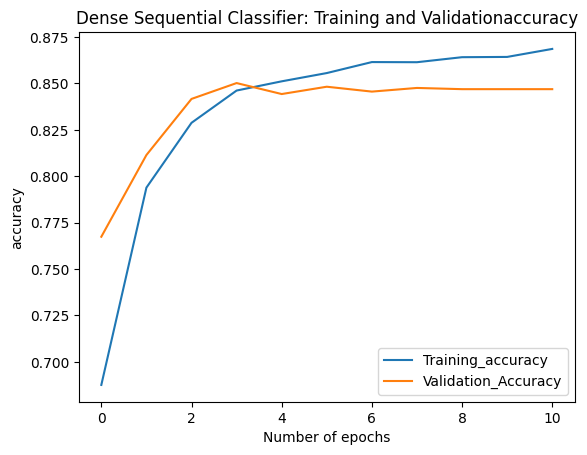

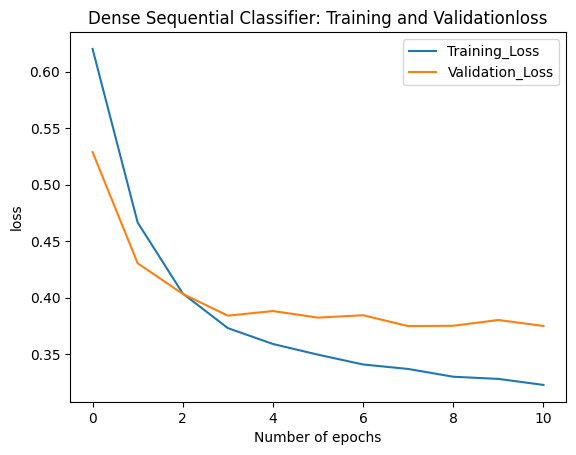

In [ ]:
#training and validation - accuracy/loss
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace=True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Dense Sequential Classifier: Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])
plot_graphs1('Training_accuracy', 'Validation_Accuracy', 'accuracy')
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# prediction on training data
Y_pred_train = model.predict(training_padded)
Y_pred_binary = (Y_pred_train > 0.5).astype(int)
accuracy_on_training_data = accuracy_score(Y_train, Y_pred_binary)

# Predictions on test data
Y_pred = model.predict(testing_padded)
Y_pred_binary = (Y_pred > 0.5).astype(int)
accuracy_on_test_data = accuracy_score(Y_test, Y_pred_binary)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_binary)

# Convert to a pandas DataFrame for better visualization
conf_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

print("Confusion Matrix Results:\n")
print(conf_df, "\n")

print('Accuracy on training data : ', accuracy_on_training_data)
print('Accuracy on test data : ', accuracy_on_test_data)

# Calculate precision
precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision on test data: {precision:.4f}")

# Calculate recall
recall = recall_score(Y_test, Y_pred_binary)
print(f"Recall on test data: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred_binary)
print(f"F1-score on test data: {f1:.4f}")

48/48 [==============================] - 0s 2ms/step
Confusion Matrix Results:

                 Predicted Negative  Predicted Positive
Actual Negative                 803                  82
Actual Positive                 151                 486 

Accuracy on training data :  0.8740686632578525
Accuracy on test data :  0.8469119579500657
Precision on test data: 0.8556
Recall on test data: 0.7630
F1-score on test data: 0.8066


Long-Short-Term-Memory Networks (LSTM)

In [ ]:
#lstm spam detection architecture

#hyperparameters

n_lstm = 20
drop_lstm = 0.2

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
model1.add(LSTM(n_lstm, dropout = drop_lstm, return_sequences = False))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience = 2)
history = model1.fit(training_padded, Y_train, epochs=num_epochs, validation_data = (testing_padded, Y_test), callbacks=[early_stop])

Epoch 1/30
272/272 [==============================] - 10s 28ms/step - loss: 0.4769 - accuracy: 0.7855 - val_loss: 0.3831 - val_accuracy: 0.8530
Epoch 2/30
272/272 [==============================] - 6s 21ms/step - loss: 0.3403 - accuracy: 0.8759 - val_loss: 0.3630 - val_accuracy: 0.8571
Epoch 3/30
272/272 [==============================] - 7s 25ms/step - loss: 0.3170 - accuracy: 0.8843 - val_loss: 0.3689 - val_accuracy: 0.8540
Epoch 4/30
272/272 [==============================] - 6s 22ms/step - loss: 0.3029 - accuracy: 0.8897 - val_loss: 0.3442 - val_accuracy: 0.8551
Epoch 5/30
272/272 [==============================] - 7s 27ms/step - loss: 0.2936 - accuracy: 0.8923 - val_loss: 0.3388 - val_accuracy: 0.8706
Epoch 6/30
272/272 [==============================] - 6s 21ms/step - loss: 0.2871 - accuracy: 0.8952 - val_loss: 0.3383 - val_accuracy: 0.8685
Epoch 7/30
272/272 [==============================] - 7s 25ms/step - loss: 0.2872 - accuracy: 0.8956 - val_loss: 0.3580 - val_accuracy: 0.845

In [ ]:
model1.evaluate(testing_padded, Y_test)

31/31 [==============================] - 0s 9ms/step - loss: 0.3422 - accuracy: 0.8654


[0.3421626091003418, 0.8654244542121887]

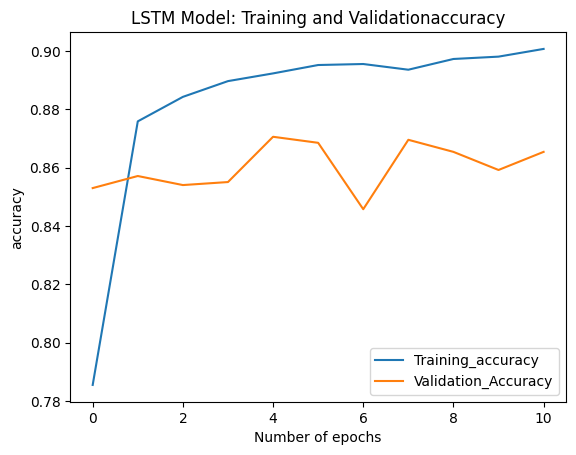

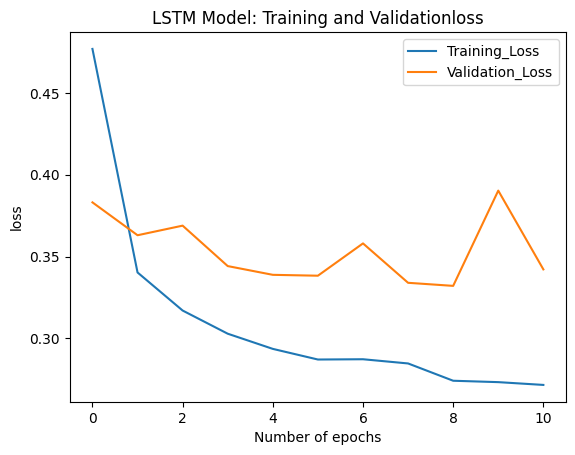

In [ ]:
#training and validation - accuracy/loss
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace=True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('LSTM Model: Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])
plot_graphs1('Training_accuracy', 'Validation_Accuracy', 'accuracy')
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# prediction on training data
Y_pred_train = model1.predict(training_padded)
Y_pred_binary = (Y_pred_train > 0.5).astype(int)
accuracy_on_training_data = accuracy_score(Y_train, Y_pred_binary)

# Predictions on test data
Y_pred = model1.predict(testing_padded)
Y_pred_binary = (Y_pred > 0.5).astype(int)
accuracy_on_test_data = accuracy_score(Y_test, Y_pred_binary)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_binary)

# Convert to a pandas DataFrame for better visualization
conf_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

print("Confusion Matrix Results:\n")
print(conf_df, "\n")

print('Accuracy on training data : ', accuracy_on_training_data)
print('Accuracy on test data : ', accuracy_on_test_data)

# Calculate precision
precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision on test data: {precision:.4f}")

# Calculate recall
recall = recall_score(Y_test, Y_pred_binary)
print(f"Recall on test data: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred_binary)
print(f"F1-score on test data: {f1:.4f}")

31/31 [==============================] - 0s 8ms/step
Confusion Matrix Results:

                 Predicted Negative  Predicted Positive
Actual Negative                 514                  45
Actual Positive                  85                 322 

Accuracy on training data :  0.9098228663446055
Accuracy on test data :  0.865424430641822
Precision on test data: 0.8774
Recall on test data: 0.7912
F1-score on test data: 0.8320


Bidirectional LSTM (Bi-LSTM)

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout = drop_lstm, return_sequences = False)))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
#training

num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)
history = model2.fit(training_padded, Y_train, epochs=num_epochs, validation_data=(testing_padded, Y_test), callbacks = [early_stop], verbose = 2)

Epoch 1/30
272/272 - 15s - loss: 0.5042 - accuracy: 0.7484 - val_loss: 0.3906 - val_accuracy: 0.8333 - 15s/epoch - 57ms/step
Epoch 2/30
272/272 - 9s - loss: 0.3315 - accuracy: 0.8722 - val_loss: 0.3448 - val_accuracy: 0.8644 - 9s/epoch - 34ms/step
Epoch 3/30
272/272 - 8s - loss: 0.2949 - accuracy: 0.8902 - val_loss: 0.3209 - val_accuracy: 0.8778 - 8s/epoch - 29ms/step
Epoch 4/30
272/272 - 9s - loss: 0.2806 - accuracy: 0.8930 - val_loss: 0.3193 - val_accuracy: 0.8737 - 9s/epoch - 33ms/step
Epoch 5/30
272/272 - 10s - loss: 0.2661 - accuracy: 0.8979 - val_loss: 0.3251 - val_accuracy: 0.8778 - 10s/epoch - 38ms/step
Epoch 6/30
272/272 - 9s - loss: 0.2591 - accuracy: 0.9010 - val_loss: 0.3150 - val_accuracy: 0.8768 - 9s/epoch - 34ms/step
Epoch 7/30
272/272 - 8s - loss: 0.2565 - accuracy: 0.9000 - val_loss: 0.3179 - val_accuracy: 0.8830 - 8s/epoch - 30ms/step
Epoch 8/30
272/272 - 10s - loss: 0.2494 - accuracy: 0.9046 - val_loss: 0.3208 - val_accuracy: 0.8778 - 10s/epoch - 35ms/step


In [ ]:
model2.evaluate(testing_padded, Y_test)

31/31 [==============================] - 0s 10ms/step - loss: 0.3208 - accuracy: 0.8778


[0.32084909081459045, 0.8778467774391174]

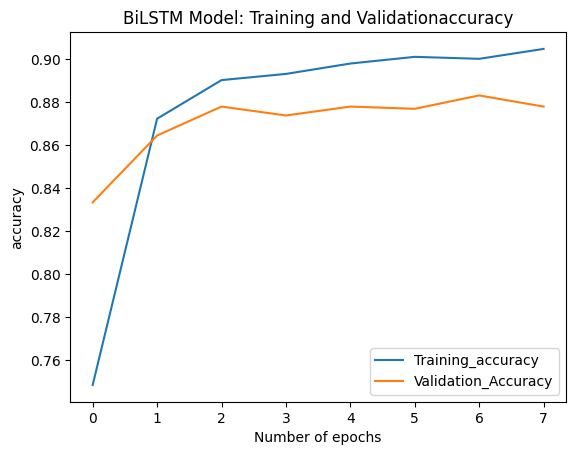

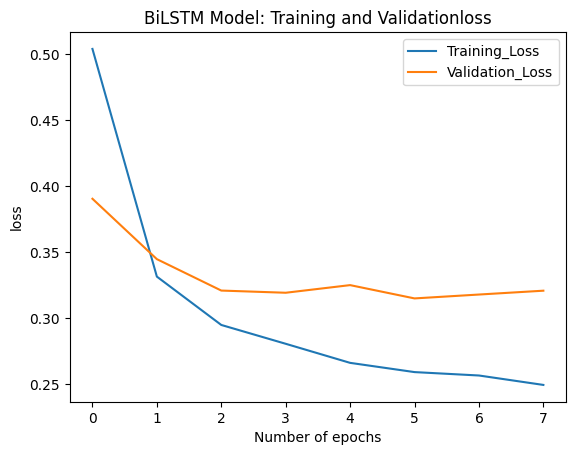

In [ ]:
#training and validation - accuracy/loss
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace=True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('BiLSTM Model: Training and Validation' + string)
  plt.xlabel('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])
plot_graphs1('Training_accuracy', 'Validation_Accuracy', 'accuracy')
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# prediction on training data
Y_pred_train = model2.predict(training_padded)
Y_pred_binary = (Y_pred_train > 0.5).astype(int)
accuracy_on_training_data = accuracy_score(Y_train, Y_pred_binary)

# Predictions on test data
Y_pred = model2.predict(testing_padded)
Y_pred_binary = (Y_pred > 0.5).astype(int)
accuracy_on_test_data = accuracy_score(Y_test, Y_pred_binary)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_binary)

# Convert to a pandas DataFrame for better visualization
conf_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

print("Confusion Matrix Results:\n")
print(conf_df, "\n")

print('Accuracy on training data : ', accuracy_on_training_data)
print('Accuracy on test data : ', accuracy_on_test_data)

# Calculate precision
precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision on test data: {precision:.4f}")

# Calculate recall
recall = recall_score(Y_test, Y_pred_binary)
print(f"Recall on test data: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(Y_test, Y_pred_binary)
print(f"F1-score on test data: {f1:.4f}")

31/31 [==============================] - 0s 10ms/step
Confusion Matrix Results:

                 Predicted Negative  Predicted Positive
Actual Negative                 517                  42
Actual Positive                  76                 331 

Accuracy on training data :  0.9125833908442604
Accuracy on test data :  0.8778467908902692
Precision on test data: 0.8874
Recall on test data: 0.8133
F1-score on test data: 0.8487


COMPARE THE RESULTS AND SELECT THE BEST MODEL

In [ ]:
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, Y_test)}")
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, Y_test)}")
print(f"BiLSTM architecture loss and accuracy: {model2.evaluate(testing_padded, Y_test)}")

30/30 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8951
Dense architecture loss and accuracy: [0.28675079345703125, 0.8950682282447815]
30/30 [==============================] - 0s 8ms/step - loss: 0.2922 - accuracy: 0.8919
LSTM architecture loss and accuracy: [0.2921980023384094, 0.891920268535614]
30/30 [==============================] - 1s 17ms/step - loss: 0.2797 - accuracy: 0.8940
BiLSTM architecture loss and accuracy: [0.2797136902809143, 0.8940188884735107]


In [ ]:
# Read the CSV file with new comments
csv_file_path = '14.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,@andree-annedumas870,what I really wanted to see and be impressive ...,2024-03-06T04:44:53Z,0,0
1,@maymafia2505,I really like that shirt on you it looks so cute,2024-03-05T02:33:01Z,0,0
2,@czarnyduch1237,Love your work keep goin❤,2024-03-04T17:36:19Z,0,0
3,@RaneemEzzat29,James felt like a psychic in this one,2024-03-04T14:11:18Z,0,0
4,@IsabellaRose89,You always make us have a big smile,2024-03-04T08:11:43Z,0,0


In [ ]:
df['Comment'].dtype

dtype('O')

In [ ]:
df['Comment'] = df['Comment'].astype(str)